# Credit Risk Analysis
- **Author:** Wiseman Radebe
- **Date:** 15/05/25
- **Objective:** 

---

## Table of Contents
1. [Environment Setup]
2. [Importing Dataset]
3. [Lookthrough Dataset]
4. [Data Exploration]
5. [Correlation]
6. [Summary]

---

# 1. Environment Setup
Setting up the required libraries and configurations for data collection.

In [3]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("Environment setup complete!")
print(f"pandas version: {pd.__version__}")
print(f"Current date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Environment setup complete!
pandas version: 2.3.1
Current date: 2025-08-25 15:56:36


# 2. Importing Dataset
Importing datataset from kaggle using their API

In [ ]:
import kagglehub
file_path = r"C:"

german_data = pd.read_csv(file_path)

print((german_data).head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


# 3. Dataset Lookthrough


In [11]:
# Checking for any missing values, data type and the shape
print(german_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [10]:
print(german_data.isnull().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


# 4. Data Exploration
Performing comprehensive data validation and quality assessment.

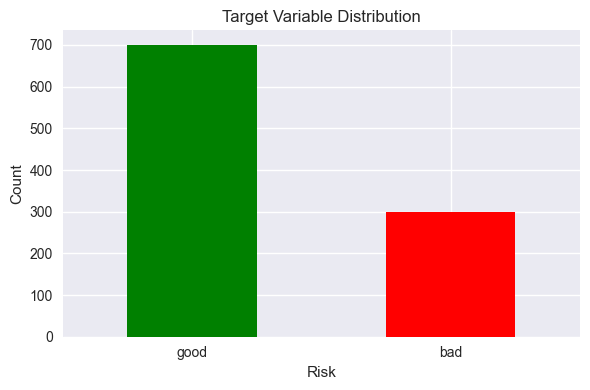

In [23]:
import matplotlib.pyplot as plt

# Count of "good" vs "bad" risks
risk_counts = german_data["Risk"].value_counts()

# Simple bar chart
plt.figure(figsize=(6,4))
risk_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Target Variable Distribution")
plt.xlabel("Risk")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



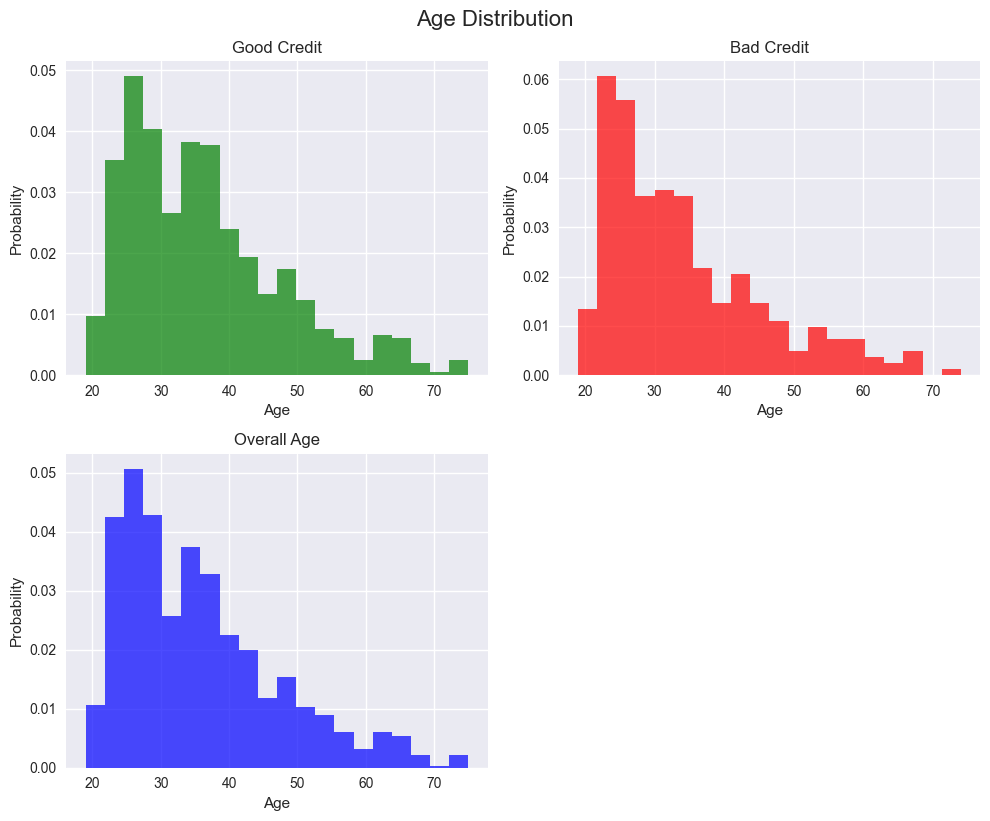

In [27]:
# Extract data
df_good = german_data.loc[german_data["Risk"] == 'good']['Age']
df_bad = german_data.loc[german_data["Risk"] == 'bad']['Age']
df_age = german_data['Age']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.delaxes(axes[1,1])  # Remove unused subplot

# First plot: Good Credit
axes[0,0].hist(df_good, bins=20, density=True, color='green', alpha=0.7)
axes[0,0].set_title('Good Credit')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Probability')

# Second plot: Bad Credit
axes[0,1].hist(df_bad, bins=20, density=True, color='red', alpha=0.7)
axes[0,1].set_title('Bad Credit')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Probability')

# Third plot: Overall Age
axes[1,0].hist(df_age, bins=20, density=True, color='blue', alpha=0.7)
axes[1,0].set_title('Overall Age')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Probability')

plt.tight_layout()
plt.suptitle("Age Distribution", y=1.02, fontsize=16)
plt.show()


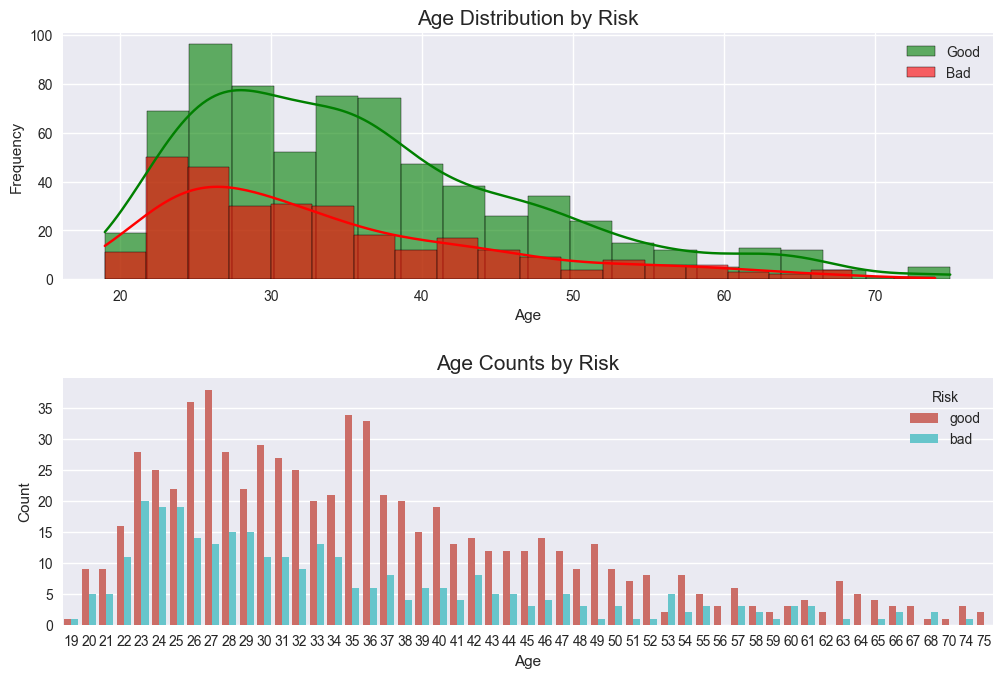

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

df_good = german_data[german_data["Risk"] == 'good']
df_bad = german_data[german_data["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.85)

# Histogram for Good vs Bad Age
sns.histplot(df_good["Age"], bins=20, color="g", alpha=0.6, ax=ax[0], label="Good",kde=True)
sns.histplot(df_bad["Age"], bins=20, color="r", alpha=0.6, ax=ax[0], label="Bad",kde=True)
ax[0].set_title("Age Distribution by Risk", fontsize=15)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Frequency")
ax[0].legend()

# Countplot for Age by Risk
sns.countplot(x="Age", data=german_data, palette="hls", ax=ax[1], hue="Risk")
ax[1].set_title("Age Counts by Risk", fontsize=15)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count")

plt.show()


# 5. Correlation
We are looking at the relationship between the variables using the correlation heat map

# 6. Summary
Key outcomes and next steps.